In [ ]:
# ADL Exercise 4

In [49]:
# This is an implementation of the suggestion in the exercise help document 
# 
import keras 
import gc

class CleanUpCallback(keras.callbacks.Callback):

  # Callback after each epoch
  def on_epoch_end(self,epochs,logs=None):
    # print(f"Loss: {logs['loss']}")
    print("Cleaning up after each epoch to save memory")
    gc.collect()

In [ ]:
# import Dataset from given link
# Get dataset from keras 
import sys
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf


from tensorflow.keras.utils import to_categorical
from keras.regularizers import l2

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [50]:
# Load cifar10 dataset
from tensorflow.keras.datasets import cifar10
(cifar10_feature_train,cifar10_label_train), (cifar10_feature_test,cifar10_label_test)= cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
# Load MNIST dataset
from tensorflow.keras.datasets import mnist
(mnist_feature_train,mnist_label_train), (mnist_feature_test,mnist_label_test)= mnist.load_data()

In [ ]:
mnist_feature_train[1].shape

(28, 28, 1)

In [ ]:
# Expand dimensions of all mnsit data
mnist_feature_train = np.expand_dims(mnist_feature_train,axis=3)
mnist_feature_test = np.expand_dims(mnist_feature_test,axis=3)


In [47]:
# Method to prepare data
def prepare_data(x_train,y_train,x_test,y_test):

  # One hot encode label values
  trainY = to_categorical(y_train)
  testY = to_categorical(y_test)

  # Normalize feature Data
  datagen = ImageDataGenerator(featurewise_std_normalization=True,featurewise_center=True,rescale=1.0/255,validation_split=0.2)
  # Fit the data
  datagen.fit(x_train[1000:2000])
  # Transform train data
  train = datagen.flow(x_train,trainY,batch_size=128,seed=10)
  # Fit the test data
  datagen.fit(x_test[1000:2000])
  # Transform test data
  test = datagen.flow(x_test,testY,batch_size=128,seed=10)
  return train, test

In [45]:
# define a function to create model
# Define our model and configure it with the desired architecture
# Choosing 32 filters with a filter size of 3x3 and a stride of 1 for the first Conv layer
# 64 filters with filter size of 3x3 and a stride of 1 for the second Conv layer
# Initialize the model
# scores =[]
def create_cifar10_model(train,test):
    model = Sequential()
    # Add a convolution layer
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same' , kernel_regularizer=l2(0.001),input_shape=(32, 32, 3)))
    # Add BatchNormalization layer
    model.add(BatchNormalization())
    # Add a pooling layer
    model.add(MaxPooling2D((2, 2)))
    # Add a dropout layer
    model.add(Dropout(0.2))
    # Repeat the process
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu', kernel_initializer='he_uniform',  kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    # Output Layer
    model.add(Dense(10, activation='softmax'))
    # Configure the model
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # Configure Early Stopping callback
    es = EarlyStopping(monitor='loss', min_delta=0, patience=3, verbose=0, mode='auto')    
    # Train the model
    history = model.fit(train, epochs=50, batch_size=128, verbose=1,validation_data=test,callbacks=[CleanUpCallback(),es])
    model.save("final_cifar10_model.h5")
    # Print model summary for documentation
    model.summary()
    return model,history


In [ ]:
# Main entry point for the python application
if __name__ == "__main__":

    print("Preparing data...")
    # Generate Data
    train,test = prepare_data(cifar10_feature_train,cifar10_label_train,cifar10_feature_test,cifar10_label_test)
    print("Training model...")
    model,history = create_cifar10_model(train,test)
    print("Storing scores...")

    plt.plot(history.history["val_loss"],label="Loss")
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.title("Categorical Cross Entropy Loss for Validation")
    plt.legend()  
    plt.show()

    plt.plot(history.history["val_accuracy"],label="Accuracy")
    plt.title("Classification  Validation Accuracy")
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.legend()  
    plt.show()          


In [ ]:
def create_mnist_model(train,test):
    model = Sequential()
    # First Conv layer
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    # Second Conv layer
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    # Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    
    # Output Layer
    model.add(Dense(10, activation='softmax'))
    # Configure the model
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # Configure Early Stopping callback
    es = EarlyStopping(monitor='loss', min_delta=0, patience=3, verbose=0, mode='auto')    
    # Train the model
    history = model.fit(train, epochs=50, batch_size=128, verbose=1,validation_data=test,callbacks=[CleanUpCallback(),es])
    model.save("final_mnist_model.h5")
    print(model.summary())
    return model,history

Preparing data...
Training model...
Epoch 1/50
469/469 [==============================] - 9s 17ms/step - loss: 0.1363 - accuracy: 0.9596 - val_loss: 0.0490 - val_accuracy: 0.9855
Epoch 2/50
469/469 [==============================] - 7s 16ms/step - loss: 0.0419 - accuracy: 0.9878 - val_loss: 0.0439 - val_accuracy: 0.9861
Epoch 3/50
469/469 [==============================] - 8s 17ms/step - loss: 0.0266 - accuracy: 0.9921 - val_loss: 0.0400 - val_accuracy: 0.9868
Epoch 4/50
469/469 [==============================] - 8s 17ms/step - loss: 0.0188 - accuracy: 0.9947 - val_loss: 0.0356 - val_accuracy: 0.9878
Epoch 5/50
469/469 [==============================] - 8s 17ms/step - loss: 0.0140 - accuracy: 0.9959 - val_loss: 0.0386 - val_accuracy: 0.9869
Epoch 6/50
469/469 [==============================] - 8s 16ms/step - loss: 0.0120 - accuracy: 0.9963 - val_loss: 0.0368 - val_accuracy: 0.9884
Epoch 7/50
469/469 [==============================] - 8s 16ms/step - loss: 0.0090 - accuracy: 0.9976 - val

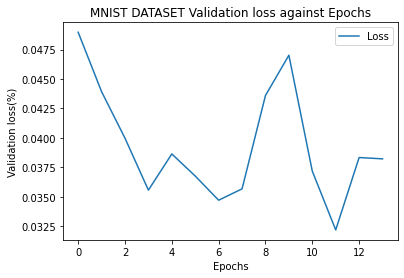

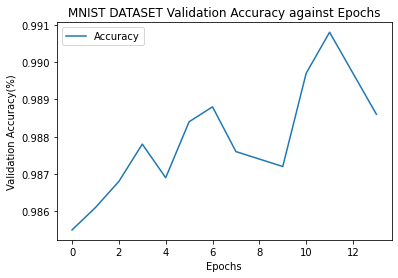

In [ ]:
# Main entry point for model training

if __name__ == "__main__":
    
    print("Preparing data...")
    # Prepare data 
    train,test = prepare_data(mnist_feature_train,mnist_label_train,mnist_feature_test,mnist_label_test)    
    print("Training model...")
    model,history = create_mnist_model(train,test)


    plt.plot(history.history['val_loss'],label="Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Validation loss(%)")
    plt.title("MNIST DATASET Validation loss against Epochs")
    plt.legend()  
    plt.show()

    # Plot training loss 
    plt.plot(history.history['val_accuracy'],label="Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Validation Accuracy(%)")
    plt.title("MNIST DATASET Validation Accuracy against Epochs")
    plt.legend()  
    plt.show()

In [ ]:
# CIFAR10 Model Prediction

In [ ]:
# Define a function to load data from file and generate an 

In [17]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
def load_prediction_image(path,target_size,colormode ="rgb"): 
  image = load_img(path,color_mode=colormode,target_size=target_size)
  image = img_to_array(image)
  return image

In [19]:
m_test = load_prediction_image("handwritten6.jpg",(28,28),"grayscale")
c_test  = load_prediction_image("dog.jpg",(32,32))

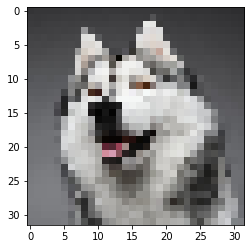

In [22]:
plt.imshow(c_test.astype("uint8"))

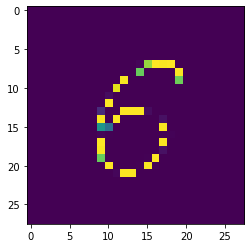

In [20]:
plt.imshow(tf.squeeze(m_test))

In [23]:
# Augment image data
def augment_image(image,augmentation_method):
  datagen = ImageDataGenerator(featurewise_std_normalization=True,featurewise_center=True)
  augmented_image = datagen.apply_transform(image,{augmentation_method:True})
  plt.imshow(augmented_image)
  return augmented_image

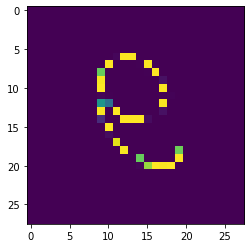

In [24]:
mnist_vertical_flipped = augment_image(tf.squeeze(m_test),"flip_vertical")

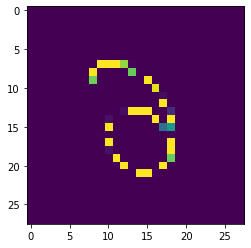

In [25]:
mnist_horizontal_flipped = augment_image(tf.squeeze(m_test),"flip_horizontal")

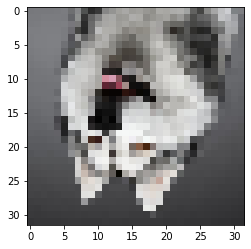

In [26]:
cifar10_vertical_flipped = augment_image(c_test.astype("uint8"),"flip_vertical")

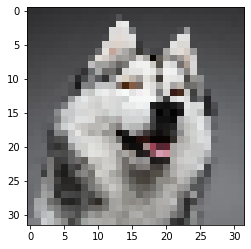

In [27]:
cifar10_horizontal_flipped = augment_image(c_test.astype("uint8"),"flip_horizontal")

In [ ]:
def make_prediction(model,image):
  # Make sure the image shape fits expected shape of the model
  image = np.expand_dims(image,axis=0)
  prediction = model.predict(image)
  prediction = np.argmax(prediction)
  return prediction

In [58]:
# Load CIFAR10 trained model
c10_model = load_model("final_cifar10_model.h5")
c10_model.evaluate()

In [ ]:
# Load MNIST trained model
m_model = load_model("final_mnist_model.h5")

In [ ]:
# Make prediction on the image of the number 6
make_prediction(m_model,m_test)

6

In [ ]:
# Predict vertically flipped image of the number 6
make_prediction(m_model,mnist_vertical_flipped)

8

In [ ]:
# Predict horizontally flipped image of the number 6
make_prediction(m_model,mnist_horizontal_flipped)

3

In [ ]:
# CIFAR10 LABEL LIST
# 0 - Aeroplane
# 1 - Automobile
# 2 - Bird
# 3 - Cat
# 4 - Deer
# 5 - Dog
# 6 - Frog
# 7 - Horse
# 8 - Ship
# 9 - Truck

In [ ]:
# CIFAR10 Model tests

In [61]:
# Prediction of 5 means the model identified a dog
make_prediction(c10_model,c_test)

5

In [60]:
# Make prediction on vertically flipped dog image
make_prediction(c10_model,cifar10_vertical_flipped)

1

In [55]:
# Make prediction on horizontally flipped dog image
make_prediction(c10_model,cifar10_horizontal_flipped)

8